# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:5px 5px;"><b>Laptop Prices Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)



<div class="alert alert-info alert-warning ">

# <span style=" color:red"> Laptop Prices Project
</span>

Welcome to the data analysis assignment on laptop prices! In this assignment, we will work with a dataset containing information about various laptops. The dataset includes several features detailing laptop specifications, such as brand, type, screen size, hardware details, and price. Through this analysis, you will gain hands-on experience in essential data analysis steps, including data cleaning, visualization, and exploratory data analysis (EDA).


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration
- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [21]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import altair as alt
file_path = 'laptop_data.csv'

df = pd.read_csv(file_path)

print(df.head())


   Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  m

In [3]:
print(df.columns)


Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 

<div class="alert alert-block alert-success">

### <span style=" color:red"> Remove unnecessary columns:
</span>

- Drop the Unnamed: 0 column as it seems to be an index column.

In [4]:
df = df.drop(columns=['Unnamed: 0'])


<div class="alert alert-block alert-success">

### <span style=" color:red"> Check for duplicates and missing values:

- Identify and remove any duplicate rows from the dataset.

- Check for missing values in the dataset.

In [5]:
df = df.drop_duplicates()


In [6]:
missing_values = df.isnull().sum()
print(missing_values)


Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


<div class="alert alert-block alert-success">

### <span style=" color:red"> Standardize data formats:

- Convert Weight to a numeric column (strip the "kg" and convert to float) etc. Apply similar operations to other required columns. You may consider adding new features.

- Verify the data types of each column and convert them to appropriate formats if necessary.

In [7]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


In [8]:
print(df.dtypes)


Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object


In [9]:

df['Price'] = df['Price'].astype(float)
df['Weight'] = df['Weight'].astype(float)
df['Inches'] = df['Inches'].astype(float)


In [10]:
df['Company'] = df['Company'].astype('category')
df['TypeName'] = df['TypeName'].astype('category')
df['OpSys'] = df['OpSys'].astype('category')



In [11]:
print(df.columns)


Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


<div class="alert alert-block alert-success">

### <span style=" color:red"> Clean categorical columns:

- Ensure consistent formatting in Company, TypeName, and OpSys columns (e.g., no leading/trailing spaces, proper case).

- Simplify OpSys categories if there are too many unique values (e.g., group similar OS types).

In [12]:
df['Company'] = df['Company'].str.strip().str.title()
df['TypeName'] = df['TypeName'].str.strip().str.title()
df['OpSys'] = df['OpSys'].str.strip().str.title()


In [13]:
print(df['OpSys'].unique())


['Macos' 'No Os' 'Windows 10' 'Mac Os X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome Os' 'Windows 7']


In [14]:
df['OpSys'] = df['OpSys'].replace({
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Linux': 'Unix/Linux',
    'Ubuntu': 'Unix/Linux',
    'Mac OS': 'Mac',
    'Mac OS X': 'Mac'
})


In [15]:
print(df['OpSys'].unique())


['Macos' 'No Os' 'Windows' 'Mac Os X' 'Unix/Linux' 'Android'
 'Windows 10 S' 'Chrome Os']


<div class="alert alert-block alert-success">

### <span style=" color:red"> Split compound columns:

- Parse ScreenResolution to extract key features such as:
- Resolution (e.g., Full HD, 4K)
- Touchscreen (Yes/No)
- Extract details from Cpu and Gpu columns, such as manufacturer or core type.

In [16]:

data = {
    'ScreenResolution': ['1920x1080 Full HD Touch', '2560x1440 Quad HD', '3840x2160 4K Touch', '1920x1080 HD'],
    'Cpu': ['Intel Core i7 4 cores', 'AMD Ryzen 5 6 cores', 'Apple M1 8 cores', 'Intel Core i5 4 cores'],
    'Gpu': ['NVIDIA GeForce GTX 1650', 'AMD Radeon RX 580', 'Apple M1 GPU', 'Intel UHD Graphics'],
}

df = pd.DataFrame(data)

df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d{3,4}p|\d{2,4}K|Full HD|HD|Quad HD|4K)', expand=False)
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touch', case=False, na=False).replace({True: 'Yes', False: 'No'})

df['Cpu Manufacturer'] = df['Cpu'].str.extract(r'(Intel|AMD|Apple|Qualcomm)', expand=False)
df['Cpu Cores'] = df['Cpu'].str.extract(r'(\d+) ?(core|cores)', expand=False)[0]

df['Gpu Manufacturer'] = df['Gpu'].str.extract(r'(NVIDIA|AMD|Intel|Apple)', expand=False)

df


,ScreenResolution,Cpu,Gpu,Resolution,Touchscreen,Cpu Manufacturer,Cpu Cores,Gpu Manufacturer
0,1920x1080 Full HD Touch,Intel Core i7 4 cores,NVIDIA GeForce GTX 1650,Full HD,Yes,Intel,4,NVIDIA
1,2560x1440 Quad HD,AMD Ryzen 5 6 cores,AMD Radeon RX 580,Quad HD,No,AMD,6,AMD
2,3840x2160 4K Touch,Apple M1 8 cores,Apple M1 GPU,4K,Yes,Apple,8,Apple
3,1920x1080 HD,Intel Core i5 4 cores,Intel UHD Graphics,HD,No,Intel,4,Intel


<div class="alert alert-block alert-success">

### <span style=" color:red"> Check for outliers in numerical columns:

- Identify outliers in columns like Inches, Weight, Ram, and Price using methods such as the IQR (Interquartile Range) or z-scores.
- Consider removing or capping the outliers if necessary to improve data quality.

In [17]:

data = {
    'Inches': [13, 14, 15, 13, 30, 17, 16, 18, 19, 12],
    'Weight': [1.2, 1.5, 1.3, 1.7, 3.5, 1.8, 1.4, 1.9, 2.0, 1.1],
    'Ram': [8, 16, 8, 4, 32, 16, 8, 8, 4, 64],
    'Price': [500, 700, 600, 550, 1000, 750, 650, 800, 5500, 400]
}

df = pd.DataFrame(data)

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

def detect_outliers_z(df, col):
    z_scores = stats.zscore(df[col])
    outliers = df[abs(z_scores) > 3]
    return outliers

outliers_inches_iqr = detect_outliers_iqr(df, 'Inches')
outliers_weight_iqr = detect_outliers_iqr(df, 'Weight')
outliers_ram_iqr = detect_outliers_iqr(df, 'Ram')
outliers_price_iqr = detect_outliers_iqr(df, 'Price')

outliers_inches_z = detect_outliers_z(df, 'Inches')
outliers_weight_z = detect_outliers_z(df, 'Weight')
outliers_ram_z = detect_outliers_z(df, 'Ram')
outliers_price_z = detect_outliers_z(df, 'Price')

outliers_inches_iqr, outliers_weight_iqr, outliers_ram_iqr, outliers_price_iqr, \
outliers_inches_z, outliers_weight_z, outliers_ram_z, outliers_price_z


(   Inches  Weight  Ram  Price
 4      30     3.5   32   1000,
    Inches  Weight  Ram  Price
 4      30     3.5   32   1000,
    Inches  Weight  Ram  Price
 4      30     3.5   32   1000
 9      12     1.1   64    400,
    Inches  Weight  Ram  Price
 8      19     2.0    4   5500,
 Empty DataFrame
 Columns: [Inches, Weight, Ram, Price]
 Index: [],
 Empty DataFrame
 Columns: [Inches, Weight, Ram, Price]
 Index: [],
 Empty DataFrame
 Columns: [Inches, Weight, Ram, Price]
 Index: [],
 Empty DataFrame
 Columns: [Inches, Weight, Ram, Price]
 Index: [])

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal

<div class="alert alert-block alert-success">

### <span style=" color:red"> Distribution of Price:

- Create a histogram or box plot to visualize the price distribution.

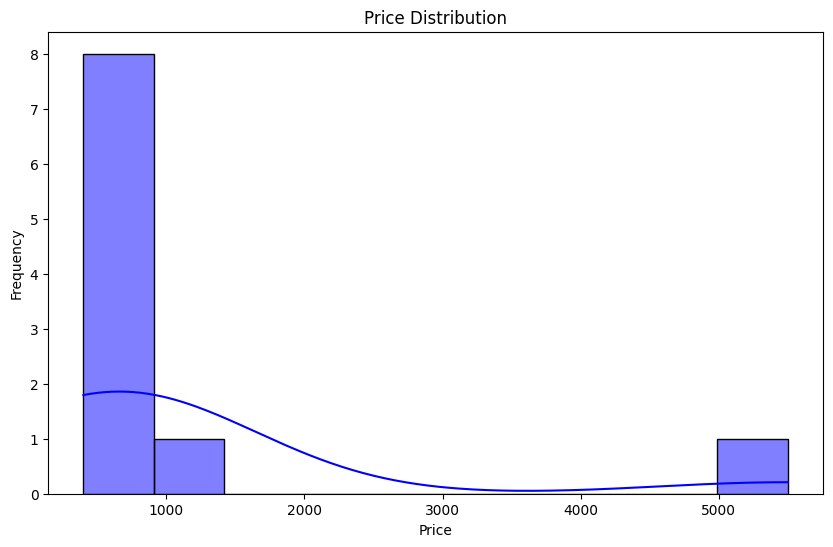

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=10, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




<div class="alert alert-block alert-success">

### <span style=" color:red"> Company-wise Analysis:

- Plot the count of laptops for each company using a bar chart.
- Visualize the average price of laptops for each company.

In [22]:
company_counts = df.groupby('Company')['Company'].count().reset_index(name='Laptop_Count')

chart = alt.Chart(company_counts).mark_bar().encode(
    x='Company',
    y='Laptop_Count',
    tooltip=['Company', 'Laptop_Count']
).properties(
    title='Şirketlere Göre Laptop Sayısı'
)

chart.show() 

alt.Chart(...)

<div class="alert alert-block alert-success">

### <span style=" color:red"> Relationship between Screen Size and Price:

- Create a scatter plot showing the relationship between Inches and Price. 

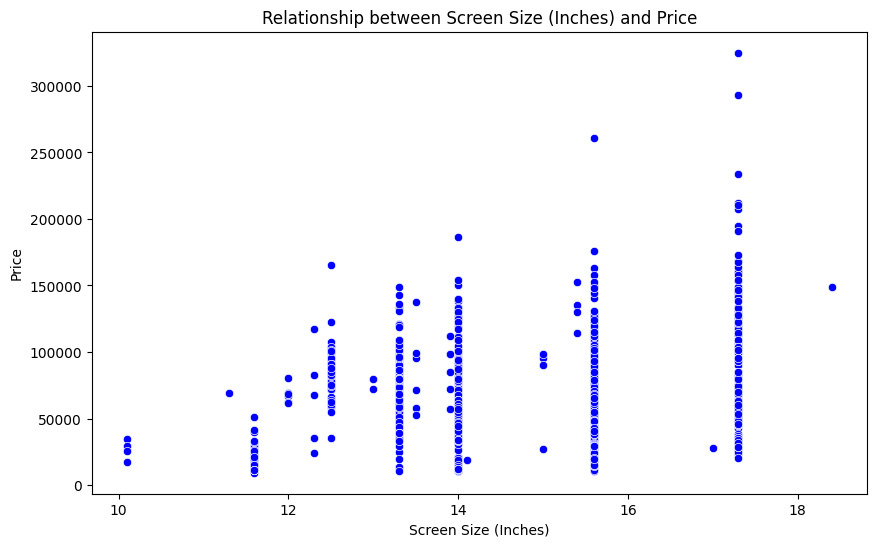

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Inches', y='Price', color='blue')
plt.title('Relationship between Screen Size (Inches) and Price')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price')
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> RAM vs Price Analysis:

- Use a bar plot or scatter plot to analyze how Ram affects Price.

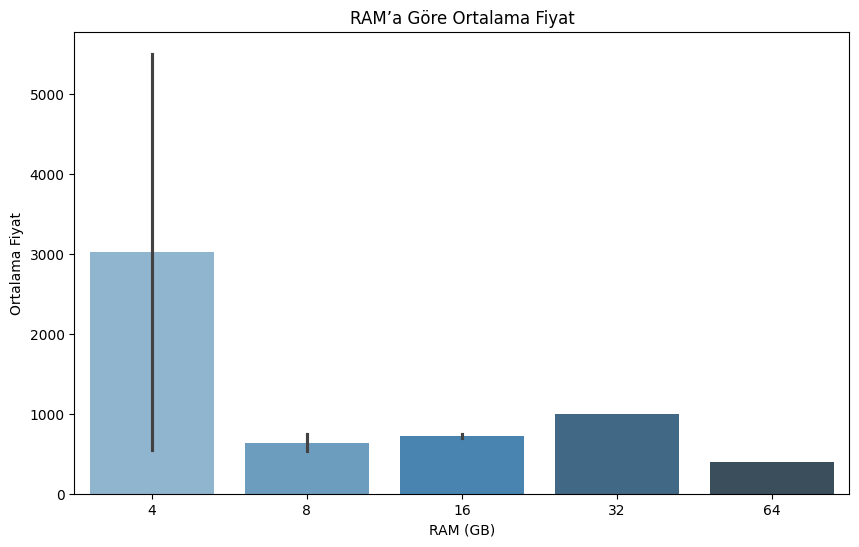

In [104]:
# Bar plot: RAM'a Göre Ortalama Fiyat
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ram', y='Price', palette='Blues_d')
plt.title('RAM’a Göre Ortalama Fiyat')
plt.xlabel('RAM (GB)')
plt.ylabel('Ortalama Fiyat')
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Operating System Market Share:

- Create a pie chart or bar chart to show the distribution of laptops by OpSys.

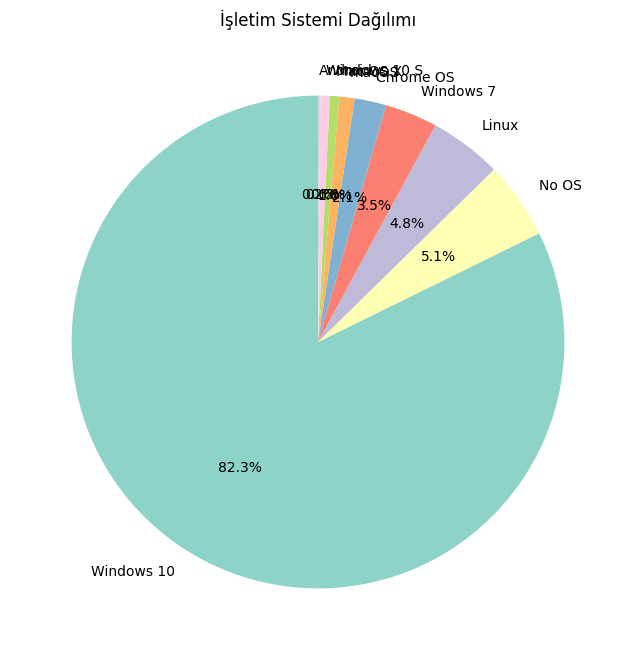

In [ ]:
plt.figure(figsize=(8, 8))
df['OpSys'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', len(df['OpSys'].unique())), startangle=90)
plt.title('İşletim Sistemi Dağılımı')
plt.ylabel('')
plt.show()


In [106]:
print(df.columns)

Index(['Inches', 'Weight', 'Ram', 'Price'], dtype='object')


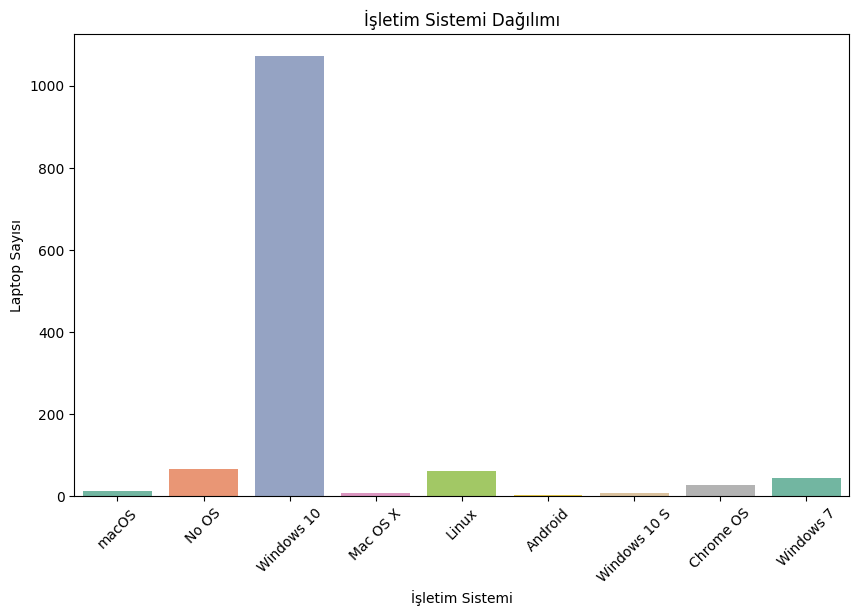

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OpSys', palette='Set2')
plt.title('İşletim Sistemi Dağılımı')
plt.xlabel('İşletim Sistemi')
plt.ylabel('Laptop Sayısı')
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Weight Distribution:

- Plot a histogram to analyze the weight distribution of laptops.

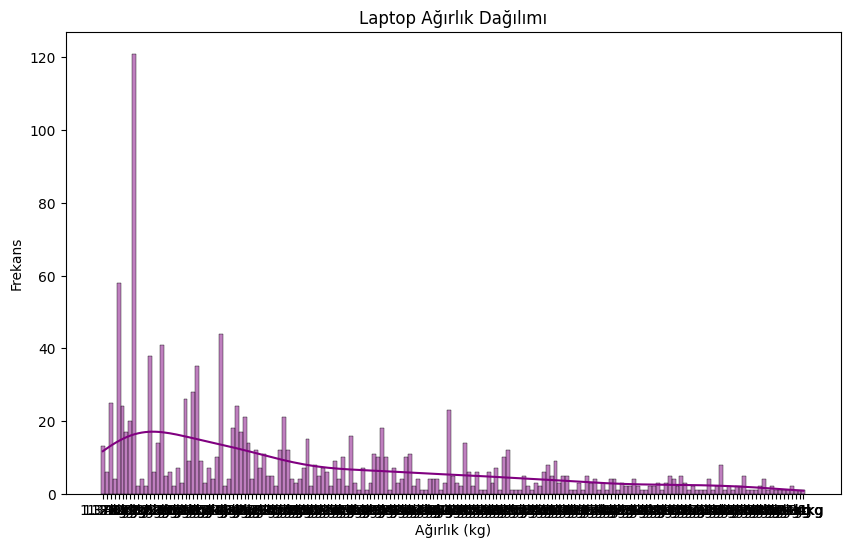

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], kde=True, bins=10, color='purple')
plt.title('Laptop Ağırlık Dağılımı')
plt.xlabel('Ağırlık (kg)')
plt.ylabel('Frekans')
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Price Correlation Analysis:

- Compute and visualize the correlation between numerical columns (Inches, Weight, Ram, etc.) and Price.

In [50]:
df['Weight'] = df['Weight'].replace({'kg': '', 'Kg': '', 'KG': ''}, regex=True).astype(float)
df['Ram'] = df['Ram'].replace({'GB': ''}, regex=True).astype(float)


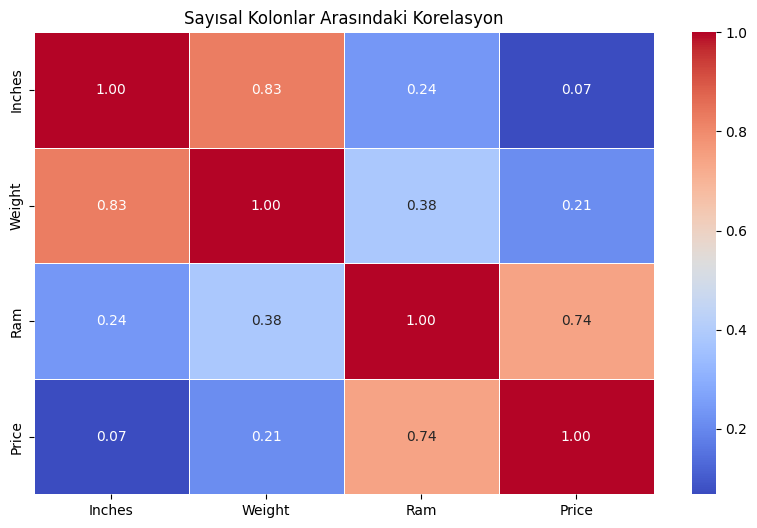

In [ ]:
correlation_matrix = df[['Inches', 'Weight', 'Ram', 'Price']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Sayısal Kolonlar Arasındaki Korelasyon')
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> ScreenResolution Impact on Price:

- Analyze how different resolution types (e.g., Full HD, 4K) affect the price.

In [52]:
df['ScreenResolution'] = df['ScreenResolution'].apply(lambda x: 'Full HD' if '1920x1080' in str(x) else ('4K' if '3840x2160' in str(x) else 'Other'))
resolution_price = df.groupby('ScreenResolution')['Price'].mean().reset_index()


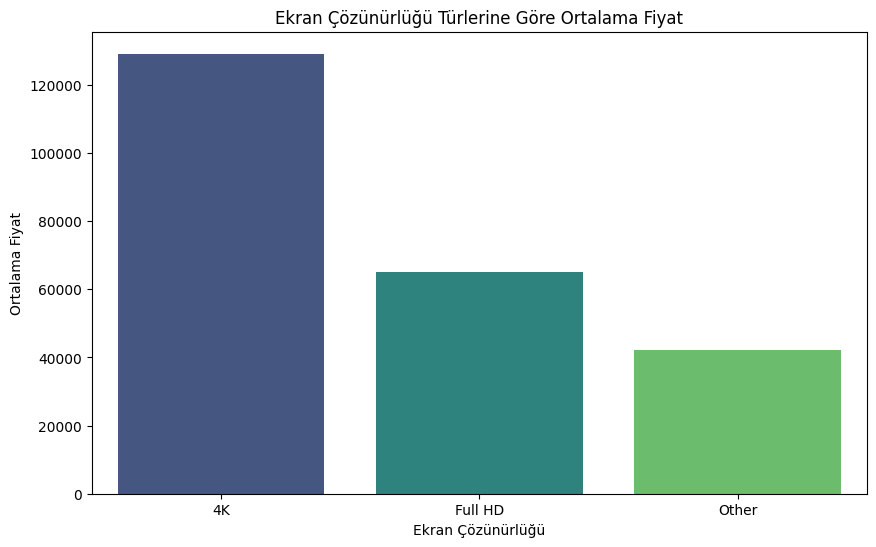

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(data=resolution_price, x='ScreenResolution', y='Price', palette='viridis')
plt.title('Ekran Çözünürlüğü Türlerine Göre Ortalama Fiyat')
plt.xlabel('Ekran Çözünürlüğü')
plt.ylabel('Ortalama Fiyat')
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Top CPU/GPU Manufacturers:

- Extract and visualize the most common CPU and GPU manufacturers.

In [5]:

chart = alt.Chart(grouped_df).mark_bar().encode(
    x=alt.X('RAM Configuration'),
    y=alt.Y('Price'),
    tooltip=['RAM Configuration', 'Price']
).properties(
    title='Average Price by RAM Configuration'
)
chart


alt.Chart(...)

<div class="alert alert-block alert-success">

### <span style=" color:red"> RAM Analysis:

- Identify the most common RAM configurations and their respective average prices.

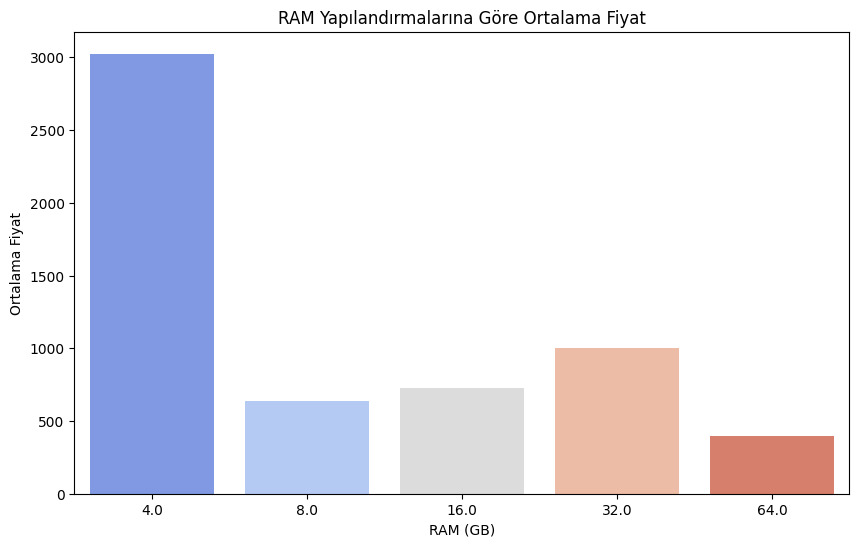

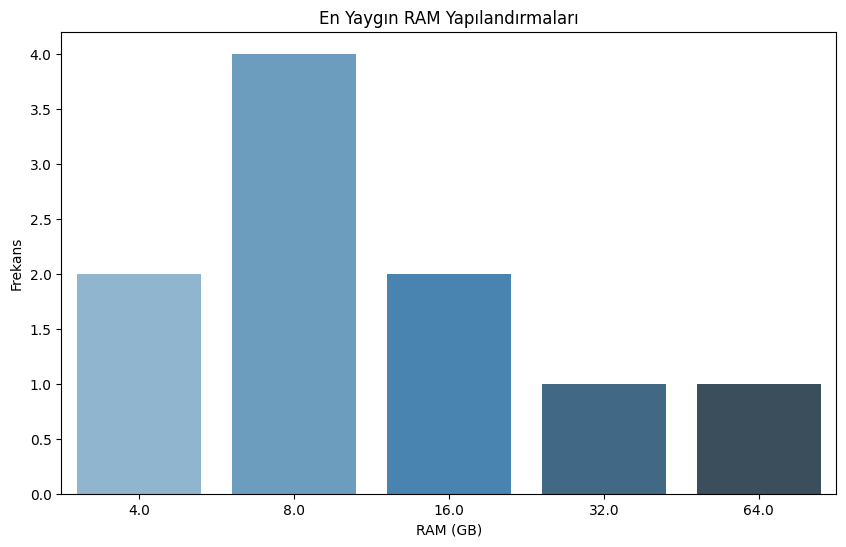

In [109]:
df['Ram_GB'] = df['Ram'].replace({'GB': ''}, regex=True).astype(float)
ram_price = df.groupby('Ram_GB')['Price'].mean().reset_index()

ram_counts = df['Ram_GB'].value_counts().reset_index()
ram_counts.columns = ['Ram_GB', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=ram_price, x='Ram_GB', y='Price', palette='coolwarm')
plt.title('RAM Yapılandırmalarına Göre Ortalama Fiyat')
plt.xlabel('RAM (GB)')
plt.ylabel('Ortalama Fiyat')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=ram_counts, x='Ram_GB', y='Count', palette='Blues_d')
plt.title('En Yaygın RAM Yapılandırmaları')
plt.xlabel('RAM (GB)')
plt.ylabel('Frekans')
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> High-end Laptop Analysis:

- Define a "high-end" laptop (e.g., based on Price or specs) and analyze their characteristics.

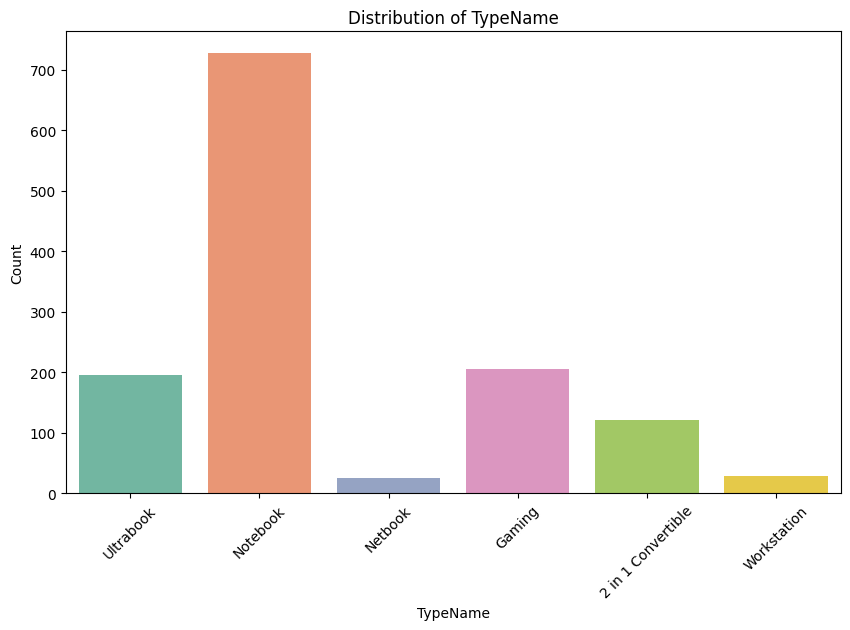

TypeName
Workstation           121497.525683
Gaming                 92247.960187
Ultrabook              82489.713429
2 in 1 Convertible     68326.360066
Notebook               41669.149113
Netbook                33898.440960
Name: Price, dtype: float64


In [25]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TypeName', palette='Set2')
plt.title('Distribution of TypeName')
plt.xlabel('TypeName')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



avg_price_by_type = df.groupby('TypeName')['Price'].mean().sort_values(ascending=False)
print(avg_price_by_type)


<div class="alert alert-block alert-success">

### <span style=" color:red"> TypeName Analysis:

- Explore the distribution of TypeName and its relationship with price (e.g., Gaming vs Ultrabook).

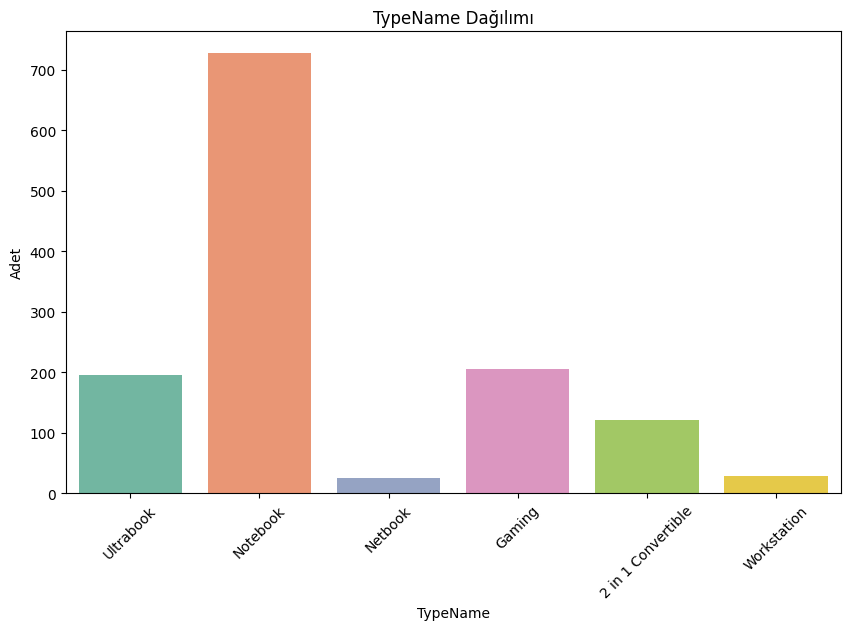

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TypeName', palette='Set2')
plt.title('TypeName Dağılımı')
plt.xlabel('TypeName')
plt.ylabel('Adet')
plt.xticks(rotation=45)
plt.show()




<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.

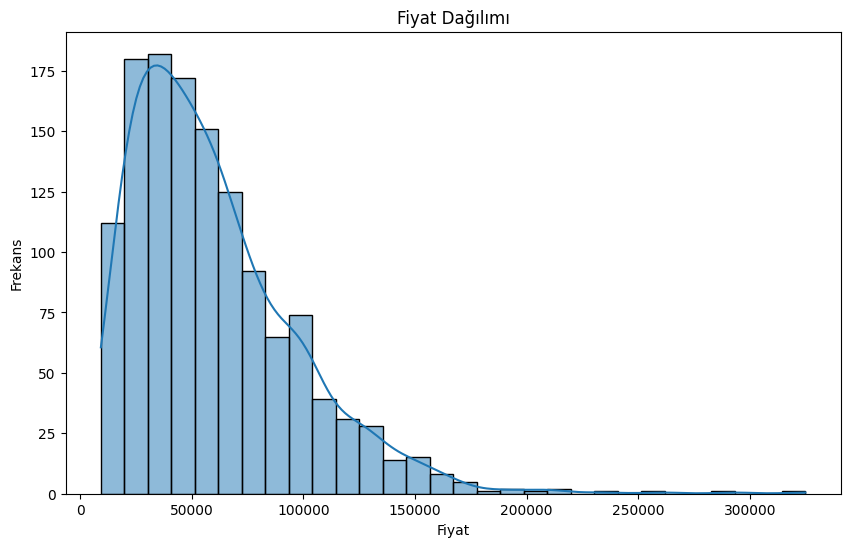

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

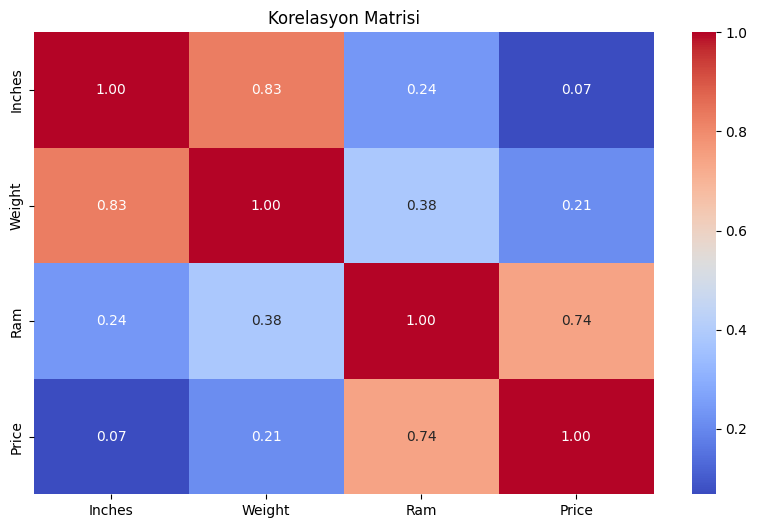

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

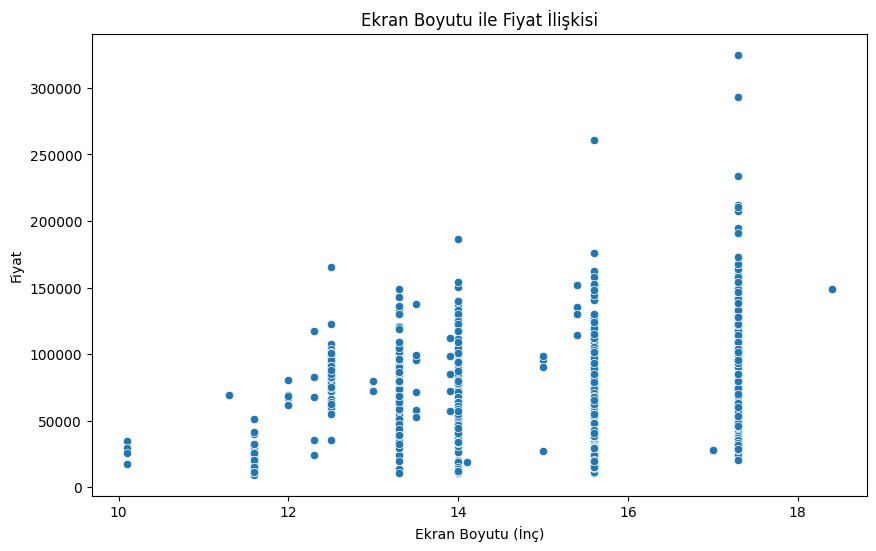

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price', data=df)
plt.title('Ekran Boyutu ile Fiyat İlişkisi')
plt.xlabel('Ekran Boyutu (İnç)')
plt.ylabel('Fiyat')
plt.show()

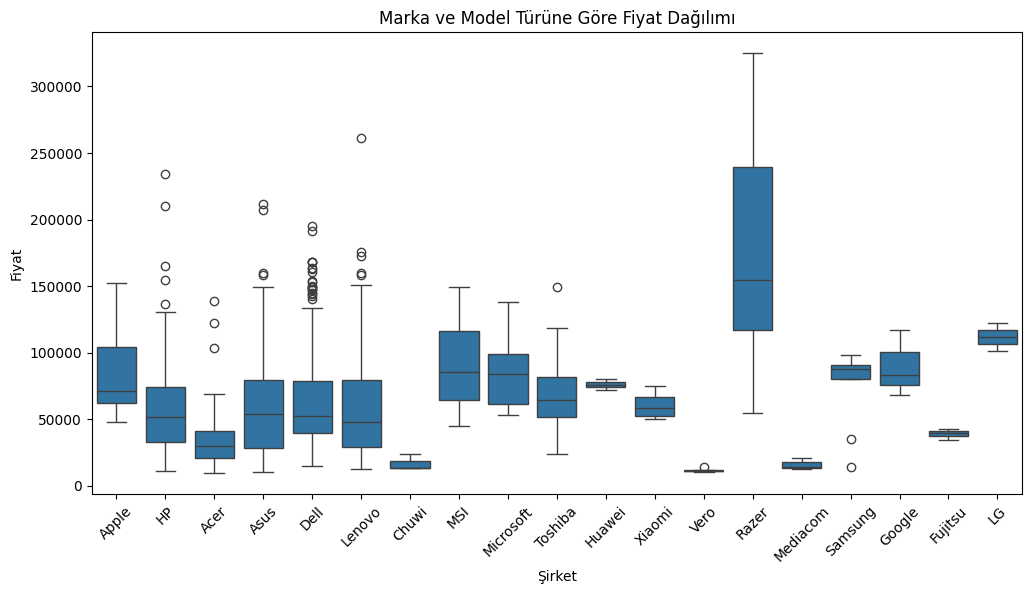

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price', data=df)
plt.title('Marka ve Model Türüne Göre Fiyat Dağılımı')
plt.xticks(rotation=45)
plt.xlabel('Şirket')
plt.ylabel('Fiyat')
plt.show()

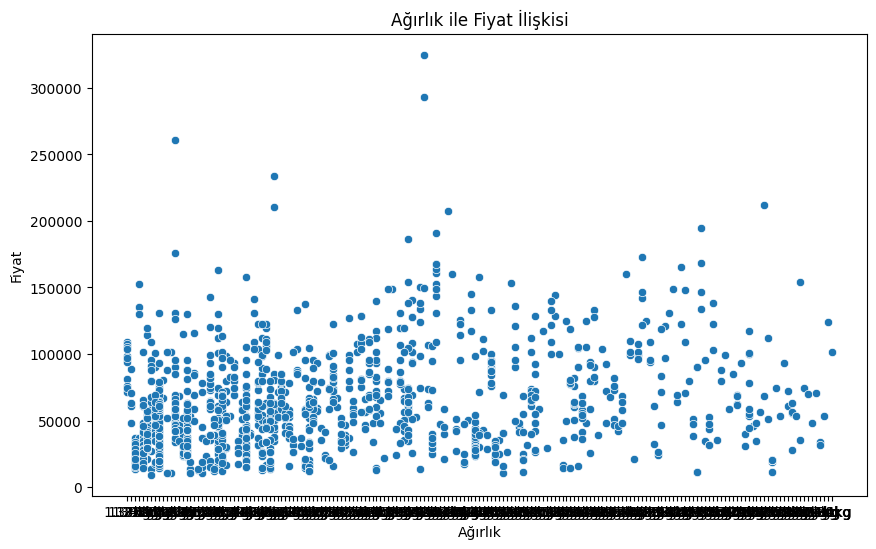

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Price', data=df)
plt.title('Ağırlık ile Fiyat İlişkisi')
plt.xlabel('Ağırlık')
plt.ylabel('Fiyat')
plt.show()


<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions

- Veri Formatlarının Standartlaştırılması
- Veri Türlerinin Doğrulanması ve Dönüştürülmesi
- Veri Türlerinin Doğrulanması ve Dönüştürülmesi
- Bileşik Sütunların Ayrılması
- Sayısal Sütunlardaki Aykırı Değerlerin Kontrolü
